# COSC 2670 - Pratical Data Science Assignment 2
## Predicting The Quality Of Red Wine
### Tenzing Sangay Bhutia (s3680446) and Qianwei Yang (s3716296)

# Introduction 

The determination of quality of wine has always been mysterious question t the history of the world because it is not absolute. It totally depends on who is judging. The combined opinion of so called wine experts normally label the quality of wine as being good or bad.

We can solve this mystery now with the implementation of machine learning algorithm which helps us to classify the label based on the data gathered from the Vinho Verde wine samples from portugal.


##  Abstract 

The objective of this project is to predict the quality of red wine and investigate the following hypothesis:
* The quality of low alcoholic red wine is better than that of high alcoholic red wine.
* How does acidity and density effect the quality of red wine.


The dataset was obtained  from red Vinho Verde wine samples, from the north of portugal, avaiable in UCI Machine Learning Repositary [http://archive.ics.uci.edu/ml/datasets/Wine+Quality?ref=datanews.io] .
This project has been divided into three phases.
- Phase - 1 includes Data Retrieving or description of the data.
- Phase - 2 includes Data Exploration and plausible hypothesis.
- Phase - 3 includes Data Modelling with supervised learning models.

## Phase 1

### 1.  DATA RETRIEVING 

#### 1.1 DataSet

The dataset was obtained from the UCI Machine Learning Repositary [http://archive.ics.uci.edu/ml/datasets/Wine+Quality?ref=datanews.io]. Due to privacy and logistic issues, only physicochemical and sensory variable are avaiable(there are no data about the brand or the price). The dataset includes 1599 observations and 12 variables namely:
- Fixed Acidity - refers to how well acidity balances out the sweetness and bitter components of wine 
- Volatile Acidity - Is a measure of wine volatile acid
- Critic Acid - Weak Organic Acid 
- Residual Sugar - Sweetness in wine is called residual sugar.(measured in g/L)
- Chlorides 
- Free Sulphur Dioxide 
- Total Sulphur Dioxide
- Density
- pH
- Sulphates
- Alcohol
- Quality (Score between 0 to 10)



#### 1.1.2  Packages 
We start by loading all revelant packages necessary for our analysis


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings 
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#### 1.1.3 Importing Dataset

We import the raw dataset into the our Jupyter workspace. As our source file is of the type csv, we use the read csv function in pandas to help us with the importation and store it to a variable name Wine. We then label the target variable 'quality' to poor, average and  good to help us with our classification problem.
We then use the shape and head function to check whether the loaded dataset is equivalent to the data in the source CSV file. The datatypes of the variables were also observed for further awareness of the dataset.


In [2]:
Wine = pd.read_csv('winequality-red.csv', sep = ';', decimal = '.')
Wine.shape
Wine1 = Wine.copy()# Keeping a Copy of the dataset
Wine1['quality'] = pd.qcut(Wine1['quality'], q=3, labels =['poor', 'average', 'good']) #Relabelling
Wine1.head(10)
Wine.dtypes

(1599, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,poor
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,poor
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,poor
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,poor


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

From the above results we have made sure that the data is equal to the source documents and all the data types are correct. Hence we have Successfully completed the data retrieving process and move to the second process of data curation which is data preprocessing.

### 1.2 Data Preprocessing or Data Preparation
In data preparation we do a more elaborate check and focus on the content of the variables. We primarily focus on typos, data entry errors, missing values, inconsistencies and transformation.


In [3]:
Wine.describe()
Wine['quality'].value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### 1.2.1  Checking Null Values

In [4]:
Wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Removing Duplicates

In [5]:
Wine1 = Wine1.drop_duplicates()
Wine1.shape
Wine1['quality'].value_counts()

(1359, 12)

poor       640
average    535
good       184
Name: quality, dtype: int64

In the Data preprocessing stage we observed that the dataset contained a lot of duplicate values hence we remove all the duplicate values to prevent our project from a biased result. There seem to be no missing values and all the content seems revelant.


#### Exploring the Target Variable

poor       640
average    535
good       184
Name: quality, dtype: int64

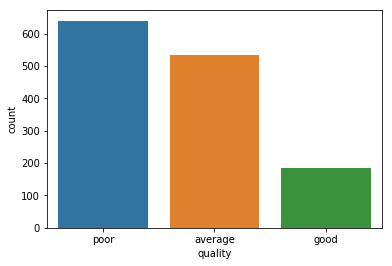

In [6]:
sns.countplot(Wine1['quality'])
Wine1['quality'].value_counts()

From the above plot, we observe an imbalance dataset, hence, undersampling is done to balance the ratio.
UnderSampling is the process where you randomly delete some of the observation from the majority class in order to match the numbers with the minority class.

good       184
average    184
poor       184
Name: quality, dtype: int64

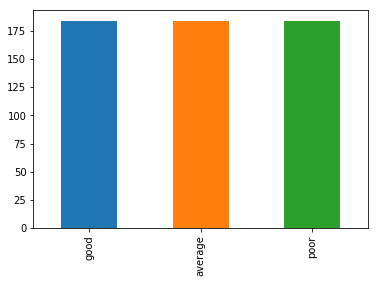

In [7]:
count_class_avg,count_class_good, count_class_poor = Wine1.quality.value_counts()
Wine_Good = Wine1[Wine1['quality'] == 'good']
Wine_Avg = Wine1[Wine1['quality'] == 'average']
Wine_Poor = Wine1[Wine1['quality'] == 'poor']

Wine_quality_poor = Wine_Poor.sample(count_class_poor)
Wine_qunlity_avg = Wine_Avg.sample(count_class_poor)

BalanceDataSet = pd.concat([ Wine_quality_poor, Wine_qunlity_avg, Wine_Good], axis=0)
BalanceDataSet.quality.value_counts().plot(kind ='bar')

BalanceDataSet.quality.value_counts()

In [8]:
def score_to_numeric(x):
    if x=='good':
        return 3
    if x=='average':
        return 2
    if x=='poor':
        return 1
BalanceDataSet['quality'] = BalanceDataSet['quality'].apply(score_to_numeric)

In [9]:
BalanceDataSet['quality'].value_counts()
BalanceDataSet['quality'] = BalanceDataSet['quality'].astype('int')
BalanceDataSet.head()
BalanceDataSet.dtypes

3    184
2    184
1    184
Name: quality, dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
808,7.4,0.53,0.12,1.9,0.165,4.0,12.0,0.99702,3.26,0.86,9.2,1
800,7.2,0.61,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,9.4,1
1385,8.0,0.81,0.25,3.4,0.076,34.0,85.0,0.99668,3.19,0.42,9.2,1
561,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,1
1138,7.5,0.41,0.15,3.7,0.104,29.0,94.0,0.99786,3.14,0.58,9.1,1


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

We change the datatype and the label of the dataset to increase the significance of the target variable and to enable the modeling with K-Nearest Neighbours.

## 2 - Phase 2

###  2.1 Data Exploration

So far we have only taken a quick glance at a data to get a general understanding of the kind of data we are manipulating. Now we would be exploring  our data to gain deeper visual insights for prediction and confirm our investigation or hypothesis:
* The quality of low alcoholic red wine is better than that of high alcoholic red wine.
* How does acidity and quantity of chloride effect the quality of red wine.

We start our investigation by deeping dive into the data by using graphical techniques and gain understanding of each feature and the interaction between features.



#### 2.1.1  Data Distribution of the Attributes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D615080>,
      dtype=object)

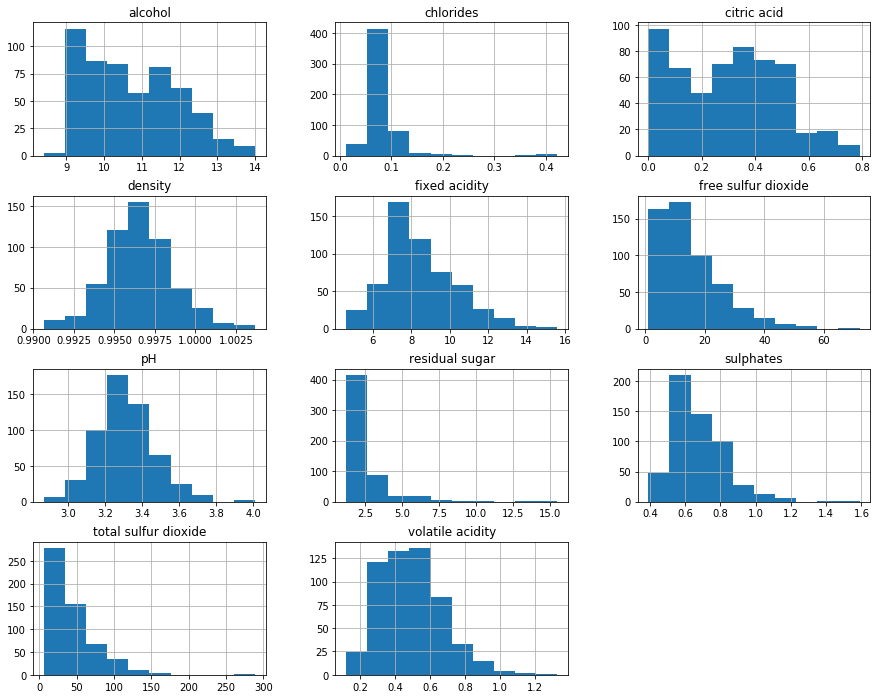

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DF5F908>,
      dtype=object)

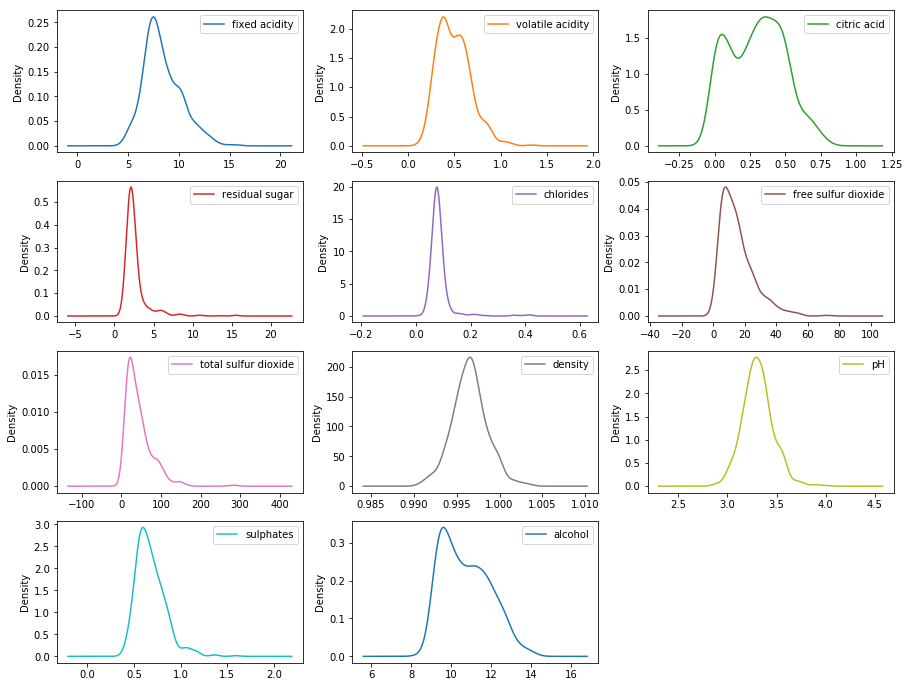

In [10]:
BalanceDropQuality = BalanceDataSet.drop(columns="quality")
BalanceDropQuality.hist(bins=10, figsize=(15,12))
plt.show()

BalanceDropQuality.plot(kind='density', subplots=True, layout=(4,3), sharex=False,figsize=(15,12))
plt.show()

We plot the histogram and the density graph together to gain better insights on the data distribution of the features. From the plot we specify the following results:
- Fixed Acidity: Quite Normally distributed 
- Volatile Acidity: Somewhat Normally Distributed
- Critic Acid: Positively Skewed
- Residual Sugar: PositivelySkewed
- Chlorides: Somewhat Normally distributed
- Free Sulphur Dioxide: Right Skewed
- Total Sulphur Dioxide: Positively Skewed
- Density: Normally Distributed
- pH: Normally Distributed
- Sulphates: Positively Skewed
- Alcohol: Positivey Skewed

#### 2.1.2 Interaction Between  the Attributes.

<Figure size 936x504 with 0 Axes>

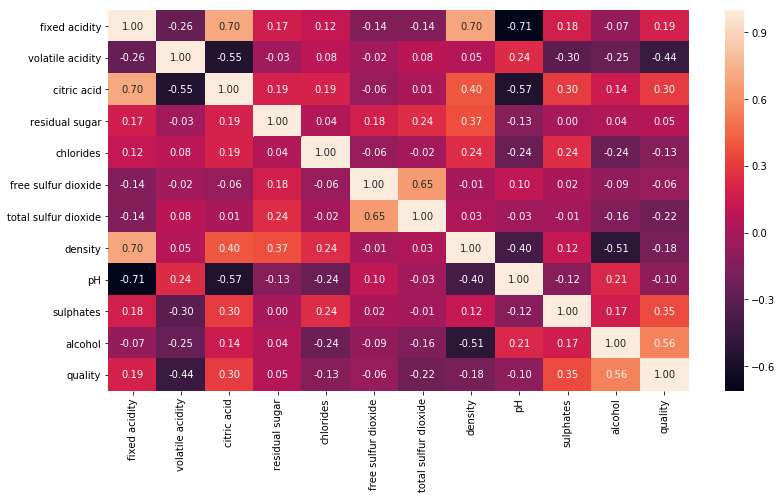

In [11]:
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(13,7))
sns.heatmap(BalanceDataSet.corr(), annot=True, fmt=".2f")
# # Correlation matrix
# correlations = BalanceDataSet.corr()
# # Plot figsize
# fig, ax = plt.subplots(figsize=(10, 10))
# # Generate Color Map
# colormap = sns.diverging_palette(220, 10, as_cmap=True)
# # Generate Heat Map, allow annotations and place floats in map
# sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
# # ax.set_xticklabels(
# #     #colum_names,
# #     rotation=45,
# #     horizontalalignment='right'
# # );
# #ax.set_yticklabels(columns_names);

# plt.show()


####  Results of the above Correaltion Matrix
The correlation coefficient ranges from -1 to 1. -1 indicates strong negative correlation, +1 indicates strong positive correlation and cofficients close to 0 mean that there is no linear correlation.

Some of observations from the above scatter matrix include a strong correlation between citric acid and fixed acidity, density and fixed acidity. 
Alcohol also has a strong correlation with quality which is an important observation for our modelling. 

####  Investigation of Hypothesis 1 :  <font color=blue>The Quality of Low Alcoholic Red Wine is Better than that of High Alcoholic Red Wine.  </font>

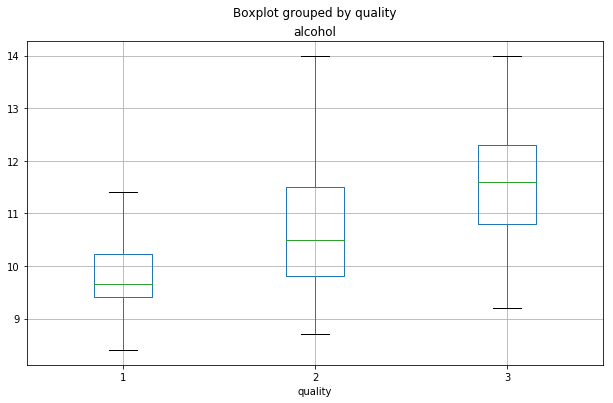

In [12]:
BalanceDataSet.boxplot(column='alcohol',by='quality',figsize=(10,6),sym='') 

From the above scatter we can see the median value of alcohol increasing with the quality of wine in the boxplot we can confirm that red wine with high alcohol content are better in quality. Hence we reject the hypotheis and confirm satistical insignificance. This finding can be of significance to consumers.

#### Investigation of hypothesis :  <font color=blue>How does Acidity and Density effect the Quality of Red Wine. </font>


Text(0,0.5,'fixed acidity')

Text(0.5,0,'chlorides')

<Figure size 1800x1440 with 0 Axes>

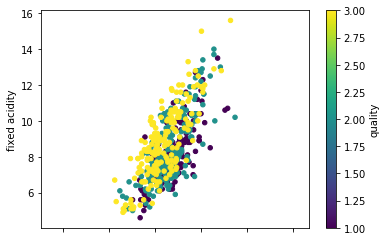

In [13]:
fig = plt.figure(figsize=(25,20))
BalanceDataSet.plot.scatter(x='density',
                      y='fixed acidity',
                     c='quality',
                     colormap='viridis')
plt.ylabel("fixed acidity")
plt.xlabel("chlorides")


There seems to be a strong positive correlation between acidity and density which is 0.67 as seen in the scatter matrix however there seems to be no difference in quality, hence the effect of the two variables on the quality is fruitless.

#### 2.1.3  Exploring Relationship Between the Target Variable and the Features.

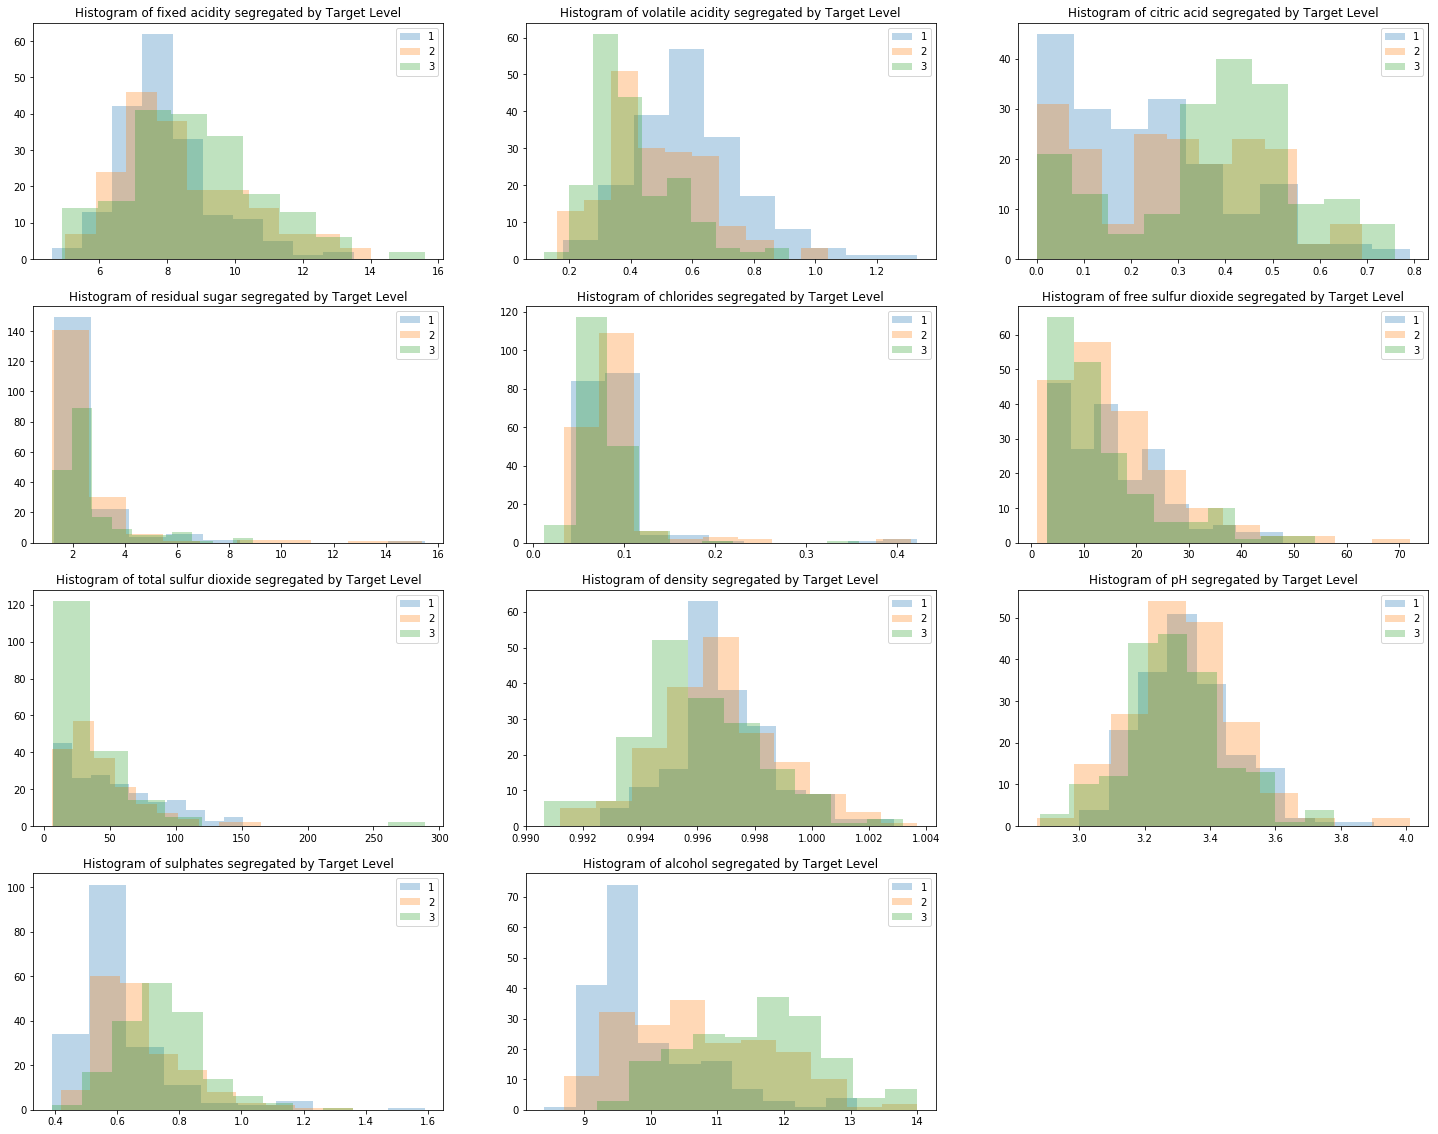

In [14]:
i = 1;
fig = plt.figure(figsize=(25,20))

for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    ax = plt.subplot(4,3,i)
    Poor = BalanceDataSet.loc[BalanceDataSet['quality'] == 1, col]
    Average = BalanceDataSet.loc[BalanceDataSet['quality'] == 2, col]
    Good = BalanceDataSet.loc[BalanceDataSet['quality'] == 3, col]
    
    Poor_hist = plt.hist(Poor, alpha = 0.3)
    Average_hist = plt.hist(Average, alpha = 0.3)
    Good_hist = plt.hist(Good, alpha = 0.3)
    
    
    Title = plt.title("Histogram of " + col +" segregated by Target Level")
     
    Legend = plt.legend(BalanceDataSet['quality'].unique())
    i = i+1

plt.show()

From the above exploration we can infer the following hypothesis:
  - The quality of wine is better if the alcohol content is more
  - Good Wines normally have less volatile acidity
  - The quality of wine is better if the amount of Critic Acid is between 0.3 to 0.5.
  - The quality of wine is inversely proportional to the volatile acididty.






## Separate Target Value

In [15]:
from sklearn import preprocessing 

Target = BalanceDataSet.quality
Data = BalanceDataSet.drop(columns = "quality")

## Scaling of Features
We perform a min-max scaling of the descriptive features. But first we make a copy of the Data to keep track of column names.

In [16]:
BalanceDataSet_copy = Data.copy()
Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data= Data_scaler.fit_transform(Data)
WineDataSet = pd.DataFrame(Data, columns=BalanceDataSet_copy.columns)
WineDataSet.sample(5, random_state=999) 

MinMaxScaler(copy=True, feature_range=(0, 1))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
488,0.500000,0.206612,0.430380,0.083916,0.178049,0.056338,0.038869,0.474330,0.263158,0.216667,0.392857
163,0.700000,0.314050,0.620253,0.069930,0.187805,0.056338,0.028269,0.732567,0.280702,0.041667,0.214286
151,0.227273,0.446281,0.000000,0.188811,0.180488,0.225352,0.137809,0.533333,0.517544,0.125000,0.196429
539,0.290909,0.165289,0.556962,0.104895,0.224390,0.098592,0.038869,0.511877,0.403509,0.325000,0.464286
520,0.327273,0.173554,0.493671,0.090909,0.151220,0.394366,0.148410,0.355556,0.394737,0.408333,0.714286


After we fit and transform the Data, the output of the scaler is a Numpy array, so all the column names are lost. And we use pd.DataFrame transform it back from array to dataframe

## Model Evaluation Strategy 

For each model, we will use 10 -fold stratified cross-validation evaluation method for hyperparameter tuning

In [17]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=10, random_state=999)

# Hyperparameter Tuning


In [18]:
X = WineDataSet.drop(['free sulfur dioxide','pH','chlorides','total sulfur dioxide','density'],axis=1)

k_range = range(1,30)
k_scores = []
results = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    
    scores = cross_val_score(knn, X, Target, cv = cv_method, scoring = 'accuracy')
    k_scores.append(scores.mean())
    results.append([k, scores.mean()])
    print("Score with " + str(k) + " Neighbours: " + str(scores.mean()))

Score with 1 Neighbours: 0.5396686159844055
Score with 2 Neighbours: 0.5563352826510721
Score with 3 Neighbours: 0.5632553606237816
Score with 4 Neighbours: 0.5943469785575048
Score with 5 Neighbours: 0.5759259259259258
Score with 6 Neighbours: 0.583625730994152
Score with 7 Neighbours: 0.5775828460038985
Score with 8 Neighbours: 0.5902534113060428
Score with 9 Neighbours: 0.5738791423001949
Score with 10 Neighbours: 0.5811890838206628
Score with 11 Neighbours: 0.595711500974659
Score with 12 Neighbours: 0.5888888888888889
Score with 13 Neighbours: 0.5908382066276803
Score with 14 Neighbours: 0.597953216374269
Score with 15 Neighbours: 0.5874269005847953
Score with 16 Neighbours: 0.5924951267056531
Score with 17 Neighbours: 0.6017543859649123
Score with 18 Neighbours: 0.5908382066276803
Score with 19 Neighbours: 0.5833333333333333
Score with 20 Neighbours: 0.5884990253411305
Score with 21 Neighbours: 0.5814814814814815
Score with 22 Neighbours: 0.5887914230019493
Score with 23 Neighbou

Text(0.5,0,'Value of K for KNN')

Text(0,0.5,'Cross-Validation Accuracy')

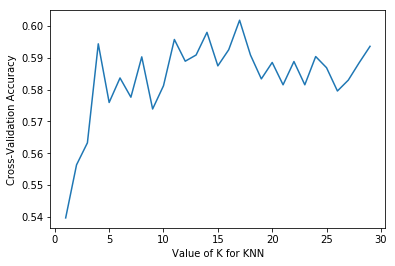

In [19]:
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validation Accuracy")

In [20]:

k_range = list(range(1,30))
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring = 'accuracy')
grid.fit(X,Target)

grid.best_score_
grid.best_estimator_
best_neighbor = grid.best_params_['n_neighbors']
print best_neighbor

C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

0.6014492753623188

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

17


We observe that the optimal KNN model has a mean score of 0.60. The best parameter is 26 nearest neighbors and p = 2.


# Modeling
# Train 50 Test 50
Splitting the dataset into the Traning set and Test set. 50% of dataset for training set, 50% for test set.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size = 0.5, random_state = 5)
X_train.head()
X_train.shape
X_test.head()
X_test.shape


,fixed acidity,volatile acidity,citric acid,residual sugar,sulphates,alcohol
272,0.181818,0.694215,0.000000,0.041958,0.041667,0.625000
343,0.281818,0.380165,0.126582,0.041958,0.083333,0.250000
311,0.227273,0.388430,0.012658,0.076923,0.158333,0.410714
83,0.445455,0.355372,0.835443,0.076923,0.233333,0.214286
92,0.263636,0.438017,0.227848,0.405594,0.316667,0.178571


(276, 6)

,fixed acidity,volatile acidity,citric acid,residual sugar,sulphates,alcohol
454,0.200000,0.388430,0.075949,0.335664,0.166667,0.428571
409,0.063636,0.371901,0.012658,0.034965,0.375000,0.732143
421,0.527273,0.099174,0.582278,0.041958,0.525000,0.428571
280,0.300000,0.231405,0.367089,0.041958,0.441667,0.196429
334,0.281818,0.396694,0.075949,0.055944,0.191667,0.303571


(276, 6)

In [22]:
# Fitting decision tree classifier to the training set
clf = DecisionTreeClassifier(max_depth = 5)

clf = clf.fit(X_train, y_train)

The next step is to check how efficiently your algorithm is predicting the quality.
Thie can be done using the score() function

In [23]:
confidence = clf.score(X_test, y_test)
print("The confidence score:", confidence)

('The confidence score:', 0.5579710144927537)


Now that we have trained our classifier with features, we obtain the quality, 
our target labels using predict() fuction

In [24]:
#Predicting the test set
y_pred = clf.predict(X_test)

In [25]:
# making confusing matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[57 27  2]
 [22 46 22]
 [13 36 51]]


The number of correct predictions for each class run on the diagonal from top-left to bottom-right.

In [26]:
#k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train,
                             y = y_train, cv = cv_method)
#we can see model's average accuracy
print("Average Accuracy: ", accuracies.mean())
print("Standard deviation: ", accuracies.std())

# print the accuracy score and classification error
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, y_pred))

('Average Accuracy: ', 0.5475832596522251)
('Standard deviation: ', 0.07436944755302492)
('Accuracy: ', 0.5579710144927537)
('Classification Error: ', 0.44202898550724634)


The classification accuracy is simply the number of correct predictions divided by all predictions or a ratio of correct predictions to total predictions.
By using cross validation score method, the average accuracy for the decision is around 55%, and the standard deviation for the decision tree is about 0.06.  And the classification error is among 45%.
The classification accuracy is nearly same as the mean of accuracy

In [27]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.66      0.64        86
           2       0.42      0.51      0.46        90
           3       0.68      0.51      0.58       100

   micro avg       0.56      0.56      0.56       276
   macro avg       0.57      0.56      0.56       276
weighted avg       0.58      0.56      0.56       276



Precision- out of all examples for which we have predicted y = 1, how many are actually belonging to class 1.

Recall - out of all examples actually belonging to class y = 1, how many have we predicted to be of class y = 1?

F1-Socore - A number that can single-handedly be used to compare two model performances (a higher F1 score implies a better performance)

From above, there is 54% accuracy labeled your model as poor which actually belonged to poor class. 42% and 68% for 'average' quality class and 'good' quality class respectively.

For recall there is among 55% accuracy that we predicted to be poor quality class that actually belonged to poor class. 52% and 57% accuracy for average quality class and goo quality class respectively.

And for F1-score, there is 51%, represent an average of precision and recall for the poor class. And 62% for the good quality class. The higher F1 score implies a better performance.

Visualizing the decision tree, the maximum depth of decision tree is 10

True

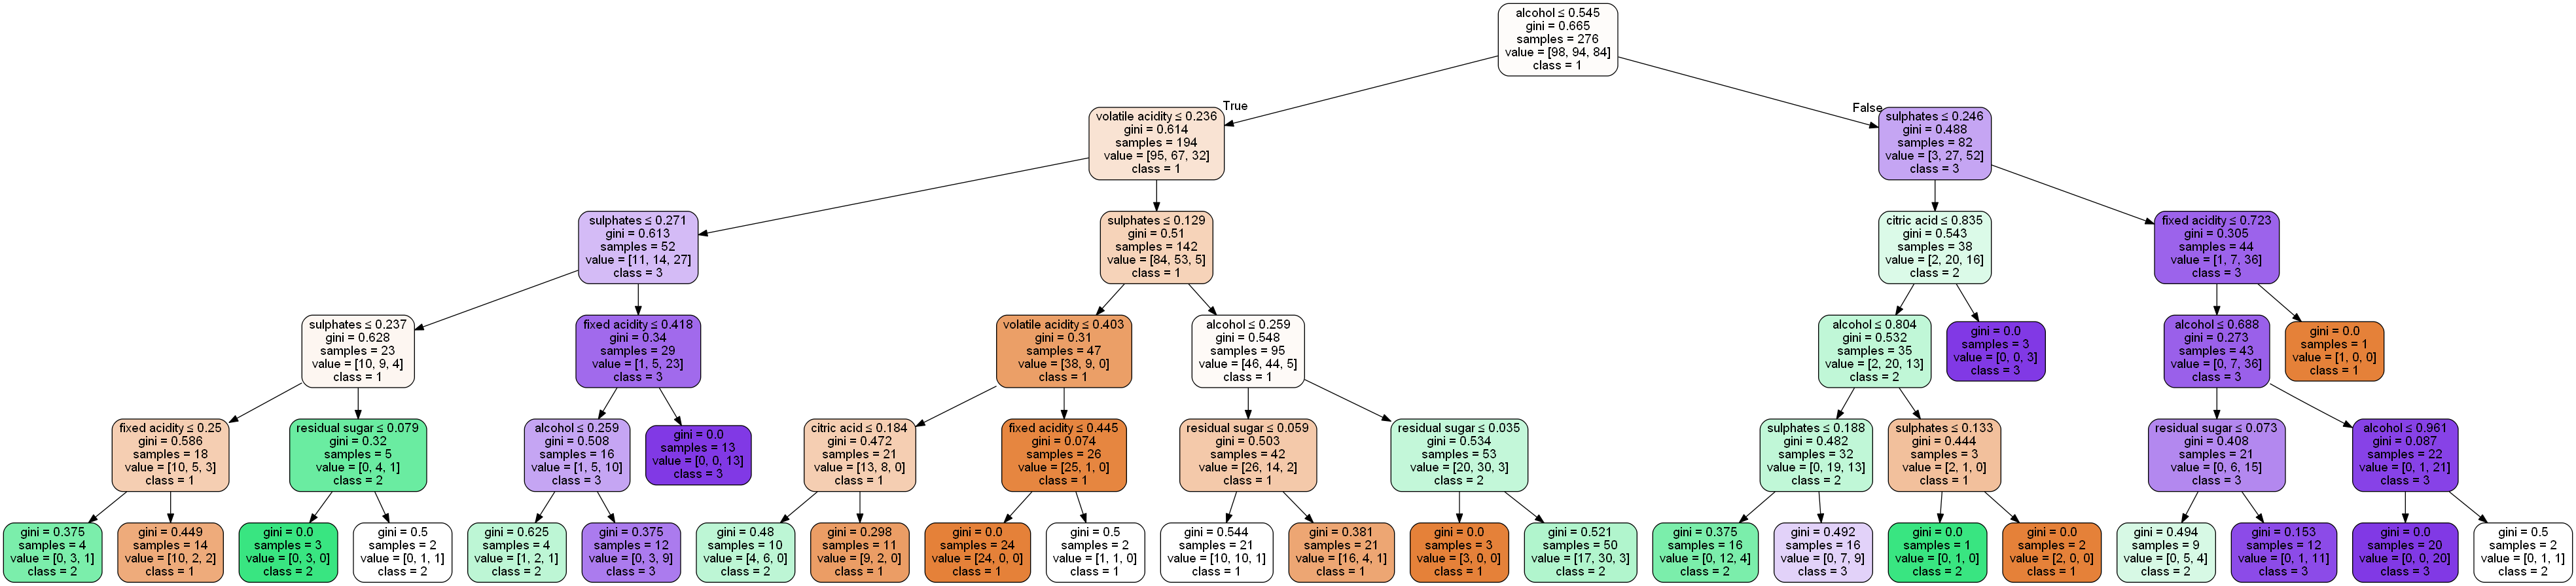

In [28]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns.values,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Wine1.png')
Image(graph.create_png())

We observed that our model first used alcohol concentration to make decisions.Also, note that if the alcohol content is high and the sulfate content is high, then the quality of the wine is likely to be "good."On the other hand, a wine with low alcohol and high volatile acidity is likely to be "poor" in quality.

## K-NN

In [29]:

#clf = KNeighborsClassifier(14, p=2,  weights='uniform') 
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=best_neighbor, p=2,
           weights='distance')
fit = clf.fit(X_train, y_train)

y_pred = fit.predict(X_test)
y_pred.shape

(276L,)

In [30]:
# Confusion matrix for the K-nearest neighbor
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[58 21  7]
 [28 27 35]
 [ 2 23 75]]


In [31]:
# classification error
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, y_pred))

('Accuracy: ', 0.5797101449275363)
('Classification Error: ', 0.42028985507246375)


The classification accuracy for the KNN is around 58% 
And the classification error is among 42%.

In [32]:

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.67      0.67        86
           2       0.38      0.30      0.34        90
           3       0.64      0.75      0.69       100

   micro avg       0.58      0.58      0.58       276
   macro avg       0.56      0.57      0.56       276
weighted avg       0.56      0.58      0.57       276



From above, there is 63% accuracy labeled your model as poor which actually belonged to poor class. 39% and 68% for 'average' quality class and 'good' quality class respectively.

For recall there is among 73% accuracy that we predicted to be poor quality class that actually belonged to poor class. 33% and 68% accuracy for average quality class and goo quality class respectively.

And form F1-score, there is 68%, represent an average of precision and recall for the poor class. And 68% for the good quality class. The higher F1 score implies a better performance.

# Train 60 Test40
## Decision Tree
Splitting the dataset into the Traning set and Test set. 60% of dataset for training set, 40% for test set.

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size = 0.4, random_state = 5)
X_train.head()
X_train.shape
X_test.head()
X_test.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,sulphates,alcohol
544,0.063636,0.289256,0.139241,0.069930,0.408333,0.928571
442,0.190909,0.132231,0.354430,0.083916,0.000000,0.589286
96,0.145455,0.438017,0.075949,0.027972,0.125000,0.633929
350,0.218182,0.082645,0.379747,0.041958,0.358333,0.285714
293,0.509091,0.173554,0.582278,0.048951,0.075000,0.357143


(331, 6)

,fixed acidity,volatile acidity,citric acid,residual sugar,sulphates,alcohol
454,0.200000,0.388430,0.075949,0.335664,0.166667,0.428571
409,0.063636,0.371901,0.012658,0.034965,0.375000,0.732143
421,0.527273,0.099174,0.582278,0.041958,0.525000,0.428571
280,0.300000,0.231405,0.367089,0.041958,0.441667,0.196429
334,0.281818,0.396694,0.075949,0.055944,0.191667,0.303571


(221, 6)

In [34]:
clf = DecisionTreeClassifier(max_depth = 5)

clf = clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

print (confidence)

y_pred = clf.predict(X_test)

X.columns.values

0.5248868778280543


array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'sulphates', 'alcohol'], dtype=object)

In [35]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[44 18  2]
 [25 34 12]
 [ 4 44 38]]


The number of correct predictions for each class run on the diagonal from top-left to bottom-right.

In [36]:
# classification error

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, y_pred))

('Accuracy: ', 0.5248868778280543)
('Classification Error: ', 0.4751131221719457)


The classification accuracy for the KNN is around 60% 
And the classification error is among 40%.

In [37]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.69      0.64        64
           2       0.35      0.48      0.41        71
           3       0.73      0.44      0.55        86

   micro avg       0.52      0.52      0.52       221
   macro avg       0.56      0.54      0.53       221
weighted avg       0.57      0.52      0.53       221



From above, there is 65% accuracy labeled your model as poor which actually belonged to poor class. 45% and 73% for 'average' quality class and 'good' quality class respectively.

For recall there is among 70% accuracy that we predicted to be poor quality class that actually belonged to poor class. 56% and 55% accuracy for average quality class and goo quality class respectively.

And form F1-score, there is 68%, represent an average of precision and recall for the poor class. And 68% for the good quality class. The higher F1 score implies a better performance.

True

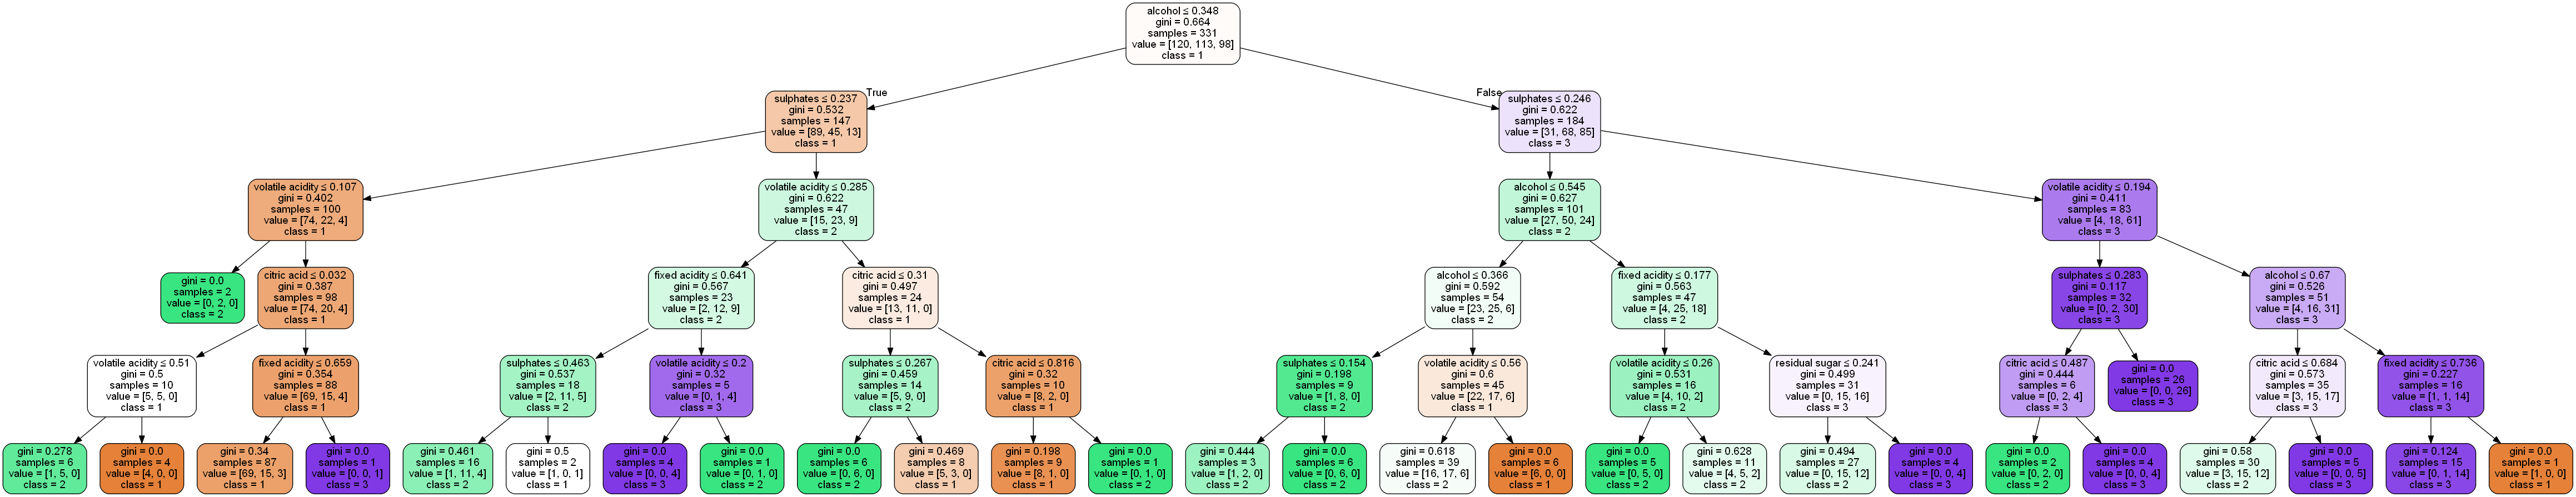

In [38]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns.values,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Wine2.png')
Image(graph.create_png())

## K-NN 

In [39]:
#clf = KNeighborsClassifier(14,p=2,  weights='uniform') #why 5, explain
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=best_neighbor, p=2,
           weights='uniform')
fit = clf.fit(X_train, y_train)

y_pred = fit.predict(X_test)
y_pred.shape

(221L,)

In [40]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[48 12  4]
 [24 21 26]
 [ 3 23 60]]


In [41]:
# classification error

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, y_pred))

('Accuracy: ', 0.583710407239819)
('Classification Error: ', 0.41628959276018096)


The classification accuracy for the KNN is around 60% 
And the classification error is among 40%.

In [42]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.75      0.69        64
           2       0.38      0.30      0.33        71
           3       0.67      0.70      0.68        86

   micro avg       0.58      0.58      0.58       221
   macro avg       0.56      0.58      0.57       221
weighted avg       0.57      0.58      0.57       221



From above, there is 58% accuracy labeled your model as poor which actually belonged to poor class. 45% and 72% for 'average' quality class and 'good' quality class respectively.

For recall there is among 81% accuracy that we predicted to be poor quality class that actually belonged to poor class. 31% and 70% accuracy for average quality class and goo quality class respectively.

And form F1-score, there is 68%, represent an average of precision and recall for the poor class. And 71% for the good quality class. The higher F1 score implies a better performance.

# Train 80 Test 20
## Decision Tree
Splitting the dataset into the Traning set and Test set. 80% of dataset for training set, 20% for test set.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size = 0.2, random_state = 5)
X_train.head()
X_train.shape
X_test.head()
X_test.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,sulphates,alcohol
75,0.281818,0.347107,0.329114,0.048951,0.166667,0.232143
179,0.190909,0.458678,0.088608,0.083916,0.125000,0.303571
467,0.390909,0.000000,0.569620,0.041958,0.308333,0.625000
452,0.336364,0.157025,0.493671,0.083916,0.316667,0.732143
369,0.290909,0.380165,0.025316,0.055944,0.150000,0.196429


(441, 6)

,fixed acidity,volatile acidity,citric acid,residual sugar,sulphates,alcohol
454,0.200000,0.388430,0.075949,0.335664,0.166667,0.428571
409,0.063636,0.371901,0.012658,0.034965,0.375000,0.732143
421,0.527273,0.099174,0.582278,0.041958,0.525000,0.428571
280,0.300000,0.231405,0.367089,0.041958,0.441667,0.196429
334,0.281818,0.396694,0.075949,0.055944,0.191667,0.303571


(111, 6)

In [44]:
clf = DecisionTreeClassifier(max_depth = 5)

clf = clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

print (confidence)

y_pred = clf.predict(X_test)

X.columns.values

0.5315315315315315


array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'sulphates', 'alcohol'], dtype=object)

In [45]:

cm = confusion_matrix(y_test, y_pred)
print (cm)


[[20  6  0]
 [15 15  9]
 [ 2 20 24]]


The number of correct predictions for each class run on the diagonal from top-left to bottom-right.

In [46]:
# classification error

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, y_pred))

('Accuracy: ', 0.5315315315315315)
('Classification Error: ', 0.46846846846846846)


The classification accuracy for the KNN is around 59% 
And the classification error is among 41%.

In [47]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.77      0.63        26
           2       0.37      0.38      0.37        39
           3       0.73      0.52      0.61        46

   micro avg       0.53      0.53      0.53       111
   macro avg       0.54      0.56      0.54       111
weighted avg       0.56      0.53      0.53       111



From above, there is 58% accuracy labeled your model as poor which actually belonged to poor class. 45% and 72% for 'average' quality class and 'good' quality class respectively.

For recall there is among 81% accuracy that we predicted to be poor quality class that actually belonged to poor class. 31% and 70% accuracy for average quality class and goo quality class respectively.

And form F1-score, there is 68%, represent an average of precision and recall for the poor class. And 71% for the good quality class. The higher F1 score implies a better performance.

True

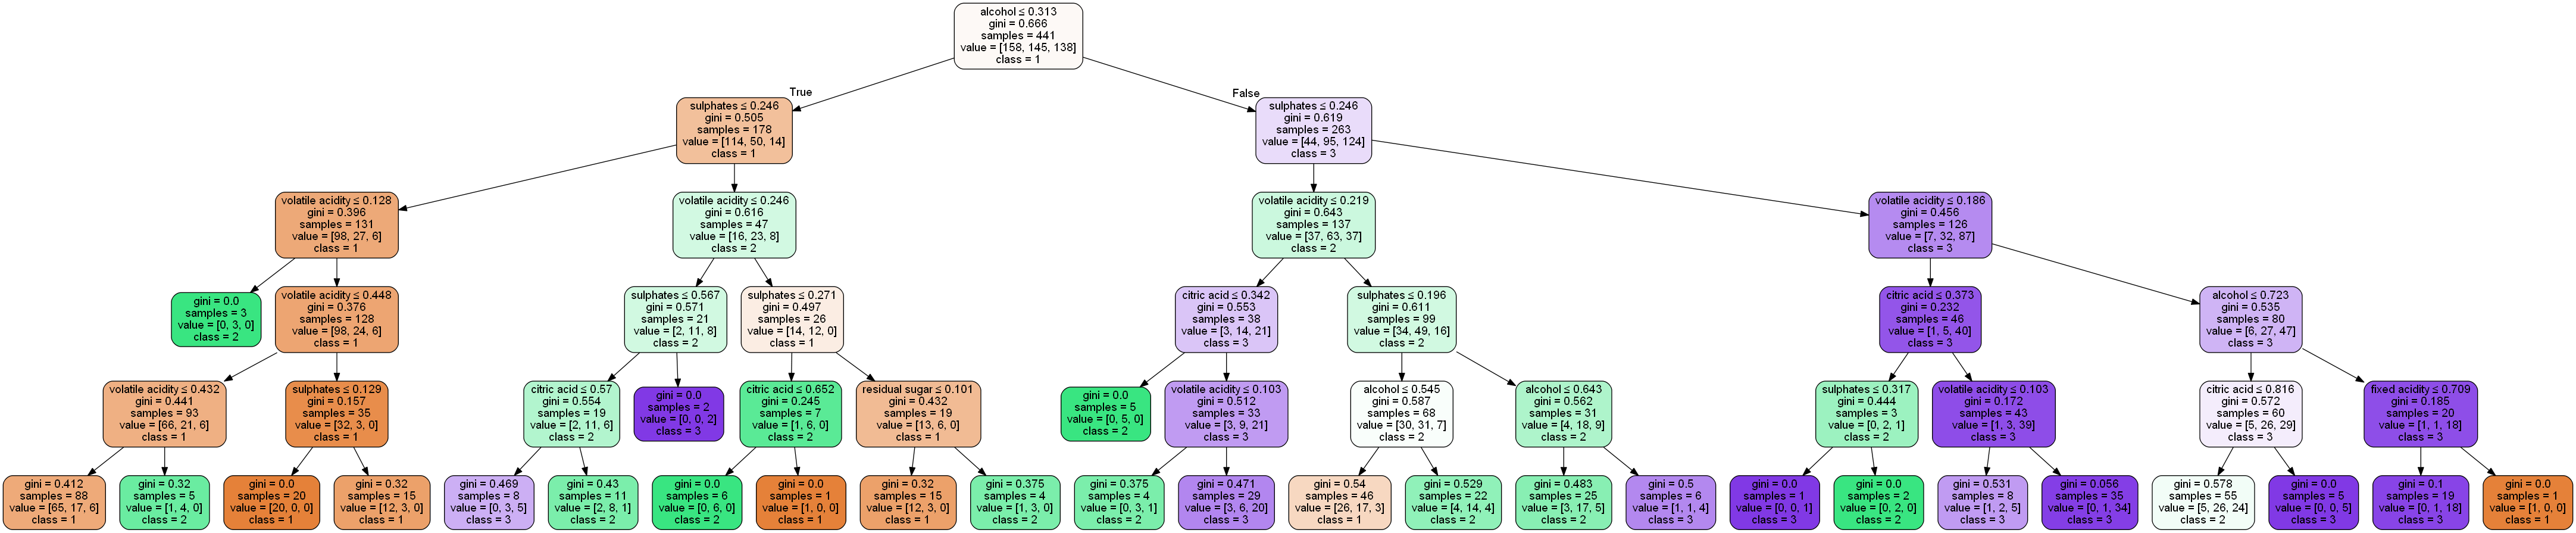

In [48]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns.values,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Wine3.png')
Image(graph.create_png())

## KNN

In [49]:
#clf = KNeighborsClassifier(14, p=2,  weights='uniform') #why 5, explain
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=best_neighbor, p=2,
           weights='uniform')
fit = clf.fit(X_train, y_train)

y_pred = fit.predict(X_test)
y_pred.shape


(111L,)

In [50]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[21  5  0]
 [14 11 14]
 [ 4  6 36]]


In [51]:
# classification error

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, y_pred))

('Accuracy: ', 0.6126126126126126)
('Classification Error: ', 0.3873873873873874)


The classification accuracy for the KNN is around 62% 
And the classification error is among 38%.

In [52]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.81      0.65        26
           2       0.50      0.28      0.36        39
           3       0.72      0.78      0.75        46

   micro avg       0.61      0.61      0.61       111
   macro avg       0.59      0.62      0.59       111
weighted avg       0.60      0.61      0.59       111



From above, there is 51% accuracy labeled your model as poor which actually belonged to poor class. 58% and 73% for 'average' quality class and 'good' quality class respectively.

For recall there is among 85% accuracy that we predicted to be poor quality class that actually belonged to poor class. 28% and 78% accuracy for average quality class and goo quality class respectively.

And form F1-score, there is 64%, represent an average of precision and recall for the poor class. And 76% for the good quality class. The higher F1 score implies a better performance.